# **Module 2: Data Preprocessing**
### Prepared by: Ramchandra Rimal

## **Learning Objectives:**
- Basic overview of accessing data from web
- View summary of data
- Basic Visualization
- Check Missing values and Impute Missing Values
- Merge the data
- Create dummy variables 
- Melting and Pivoting

## Import necessary libraries

In [1]:
import pandas as pd  
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import datetime as dt
import pandas_datareader.data as web

import warnings
warnings.filterwarnings('ignore')


In [2]:
#check the version of main libraries

print("Pandas version:", pd.__version__)

print("Numpy version:",np.__version__)

print("matplotlib Version",matplotlib.__version__ )

print("Seaborn version:",sns.__version__)

#pip install --upgrade numpy
#pip install --upgrade pandas

Pandas version: 2.0.3
Numpy version: 1.22.4
matplotlib Version 3.7.1
Seaborn version: 0.11.1


In [3]:
#widen the notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Extracting data from the web

In [4]:
start = dt.datetime(2021, 1, 26)
end = dt.datetime(2023, 8, 25)
ticker = 'TSLA'

#sometimes the pandas datareader not working
#data  =  web.DataReader(ticker, 'yahoo', start, end)[['Open','Close', 'Volume']]


In [5]:
#install yfinance

#!pip install yfinance

import yfinance as yf

In [6]:
#import data using yfinance

data  =  yf.download(ticker, start, end)[['Open','Close', 'Volume']]
data.head()

[*********************100%***********************]  1 of 1 completed


Open       Close     Volume
Date                                         
2021-01-26  297.126678  294.363342   69394800
2021-01-27  290.116669  288.053345   82002000
2021-01-28  273.333344  278.476654   79134000
2021-01-29  276.666656  264.510010  104972400
2021-02-01  271.429993  279.936676   76174200

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.tail()

Open       Close     Volume
Date                                         
2023-08-18  214.119995  215.490005  135813700
2023-08-21  221.550003  231.279999  135702700
2023-08-22  240.250000  233.190002  130597900
2023-08-23  229.339996  236.860001  101077600
2023-08-24  238.660004  230.039993   99777400

## Statistical summary of the data

In [9]:
data.describe()
with pd.option_context('float_format', '{:.2f}'.format): print(data.describe()) 
# used with the with statement since don't want to change the whole settings but only apply for a particular output:


        Open  Close       Volume
count 650.00 650.00       650.00
mean  247.13 246.83  99267091.69
std    59.50  59.25  43696442.78
min   103.00 108.10  29401800.00
25%   205.30 206.27  67300125.00
50%   239.37 238.97  89557200.00
75%   285.03 286.16 120209250.00
max   411.47 409.97 306590600.00


In [11]:
data.describe().round(2)

Open   Close        Volume
count  650.00  650.00  6.500000e+02
mean   247.13  246.83  9.926709e+07
std     59.50   59.25  4.369644e+07
min    103.00  108.10  2.940180e+07
25%    205.30  206.27  6.730012e+07
50%    239.37  238.97  8.955720e+07
75%    285.03  286.16  1.202092e+08
max    411.47  409.97  3.065906e+08

In [12]:
pd.options.display.float_format = '{:,.2f}'.format # change whole setting to print two decimal places

data.describe()


Open  Close         Volume
count 650.00 650.00         650.00
mean  247.13 246.83  99,267,091.69
std    59.50  59.25  43,696,442.78
min   103.00 108.10  29,401,800.00
25%   205.30 206.27  67,300,125.00
50%   239.37 238.97  89,557,200.00
75%   285.03 286.16 120,209,250.00
max   411.47 409.97 306,590,600.00

<Figure size 640x480 with 0 Axes>

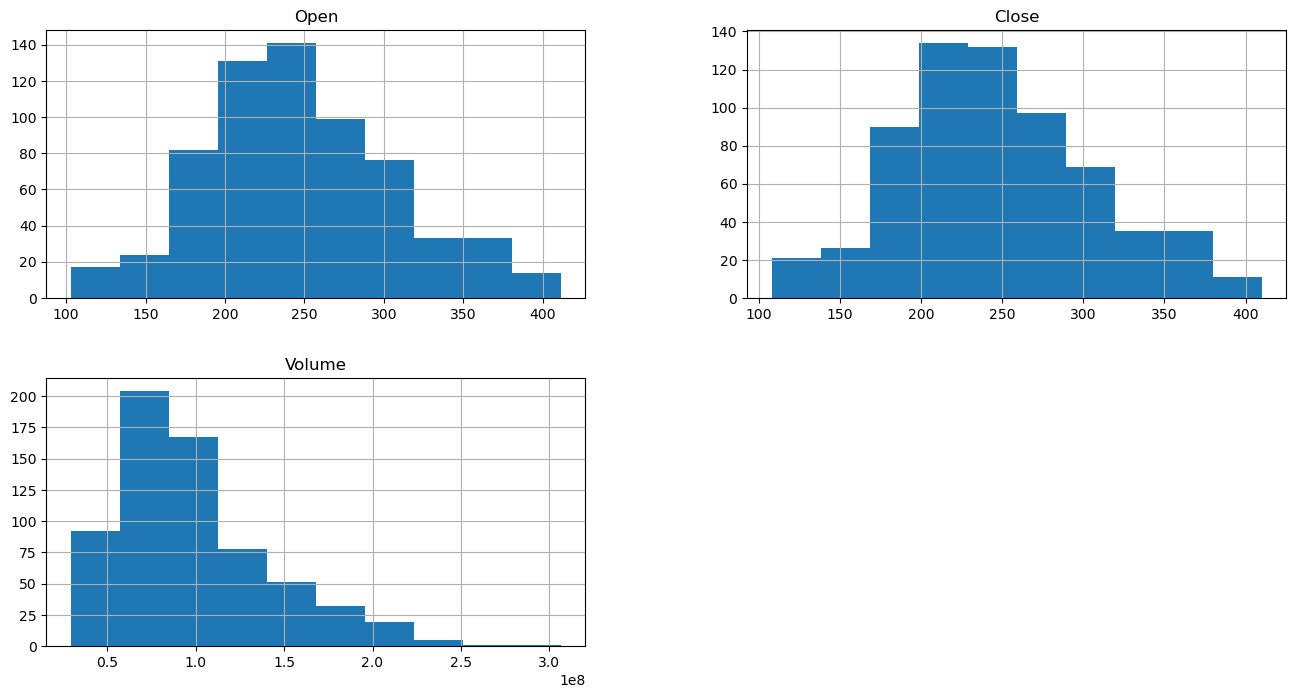

In [13]:
fig = plt.figure()
data.hist(figsize = (16,8))
#fig.savefig("histograms.png")
plt.show()

In [14]:
print(data.sample(10))

             Open  Close     Volume
Date                               
2022-10-07 233.94 223.07   83916800
2023-08-18 214.12 215.49  135813700
2022-04-28 299.99 292.50  124948500
2022-10-19 219.80 222.04   66571500
2021-09-09 251.14 251.62   42233100
2021-02-12 267.09 272.04   71304900
2023-03-24 191.65 190.41  116312400
2021-10-18 283.93 290.04   72621600
2023-01-24 143.00 143.89  158699100
2022-01-04 396.52 383.20  100248300


In [15]:
print("Shape:", data.shape)

Shape: (650, 3)


In [16]:
 data.shape[0]

650

In [17]:
print("The number of rows and columns of data are:",  data.shape[0],  data.shape[1])

The number of rows and columns of data are: 650 3


In [18]:
print("The number of rows is {} and the number of columns in the data is {}.".format(data.shape[0],  data.shape[1]))

The number of rows is 650 and the number of columns in the data is 3.


In [19]:
print(f"The number of rows is {data.shape[0]} and the number of columns in the data is {data.shape[1]}.")

The number of rows is 650 and the number of columns in the data is 3.


## Extracting the VIX data from yahoo 

In [20]:

vix = yf.download('^VIX', start, end)['Close']
vix.head()

[*********************100%***********************]  1 of 1 completed


Date
2021-01-26   23.02
2021-01-27   37.21
2021-01-28   30.21
2021-01-29   33.09
2021-02-01   30.24
Name: Close, dtype: float64

In [21]:
vix.describe()

count   650.00
mean     21.40
std       5.05
min      12.91
25%      17.46
50%      20.43
75%      24.47
max      37.21
Name: Close, dtype: float64

In [22]:
print(vix.tail())

Date
2023-08-18   17.30
2023-08-21   17.13
2023-08-22   16.97
2023-08-23   15.98
2023-08-24   17.20
Name: Close, dtype: float64


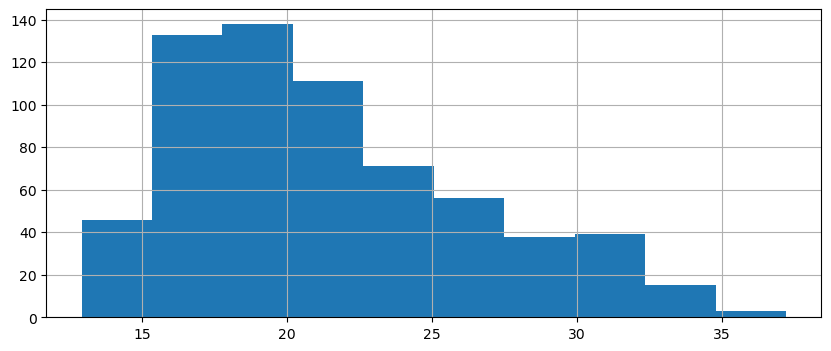

In [23]:
fig = plt.figure(figsize = (10,4))
vix.hist()
#fig.savefig("histograms.png")
plt.show()

In [24]:
import plotly.express as px

#https://plotly.com/python/histograms/

# Create histogram
fig = px.histogram(vix, 
                   nbins=50
)
# Customize the appearance of the bins
fig.update_traces(
    marker=dict(color='blue', opacity=0.5, line=dict(color='black', width=1))
)

# use the update_layout method to adjust the size of the plot
fig.update_layout(
    width=1200,
    height=500
)

# Add a title for the whole figure
fig.update_layout(title={
        'text': "Histogram of VIX Scores",
        'font': {'size': 24},
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()




In [25]:
print("Shape:", vix.shape)

Shape: (650,)


## Merge the data

In [26]:
st = pd.merge(data, vix, left_index=True,right_index=True)

#the rows with matching index values in both DataFrames will be merged together.

In [27]:
st.head()

Open  Close_x     Volume  Close_y
Date                                          
2021-01-26 297.13   294.36   69394800    23.02
2021-01-27 290.12   288.05   82002000    37.21
2021-01-28 273.33   278.48   79134000    30.21
2021-01-29 276.67   264.51  104972400    33.09
2021-02-01 271.43   279.94   76174200    30.24

In [28]:
#vix = st[['Close_y']]
st.columns = ['Open', 'Close', 'Volume', 'VIX']
print(st.head())

             Open  Close     Volume   VIX
Date                                     
2021-01-26 297.13 294.36   69394800 23.02
2021-01-27 290.12 288.05   82002000 37.21
2021-01-28 273.33 278.48   79134000 30.21
2021-01-29 276.67 264.51  104972400 33.09
2021-02-01 271.43 279.94   76174200 30.24


## Check if there are missing values

In [29]:
st.isna()


Open  Close  Volume    VIX
Date                                   
2021-01-26  False  False   False  False
2021-01-27  False  False   False  False
2021-01-28  False  False   False  False
2021-01-29  False  False   False  False
2021-02-01  False  False   False  False
...           ...    ...     ...    ...
2023-08-18  False  False   False  False
2023-08-21  False  False   False  False
2023-08-22  False  False   False  False
2023-08-23  False  False   False  False
2023-08-24  False  False   False  False

[650 rows x 4 columns]

In [30]:
st.isna().any()

Open      False
Close     False
Volume    False
VIX       False
dtype: bool

In [31]:
st.isna().sum()

Open      0
Close     0
Volume    0
VIX       0
dtype: int64

## No missing Values, Great!

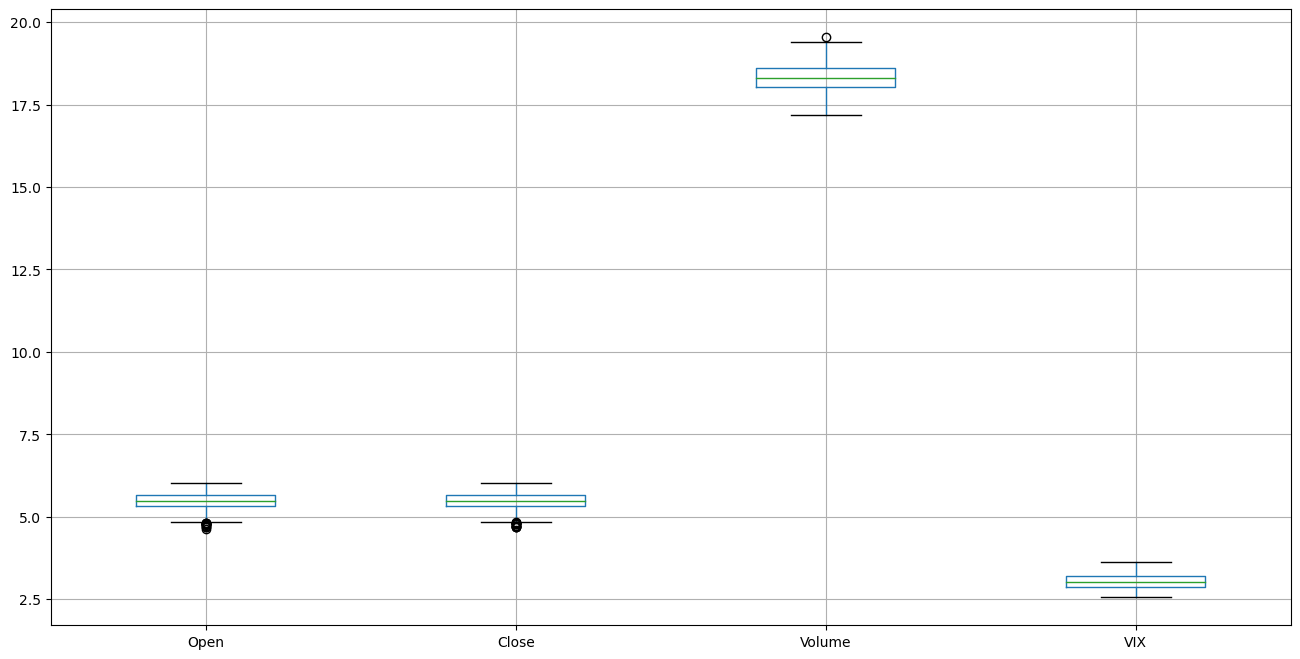

In [32]:
fig = plt.figure(figsize = (16,8))
np.log(st).boxplot()
#fig.savefig("boxpot.png")
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
st_scaled = scaler.fit_transform(st)

In [34]:
type(st_scaled)

numpy.ndarray

In [35]:
st_scaled = pd.DataFrame(st_scaled)
st_scaled.describe()

#with pd.option_context('float_format', '{:.2f}'.format): print(st_scaled.describe()) 

0      1      2      3
count 650.00 650.00 650.00 650.00
mean    0.00  -0.00  -0.00  -0.00
std     1.00   1.00   1.00   1.00
min    -2.42  -2.34  -1.60  -1.68
25%    -0.70  -0.69  -0.73  -0.78
50%    -0.13  -0.13  -0.22  -0.19
75%     0.64   0.66   0.48   0.61
max     2.76   2.76   4.75   3.13

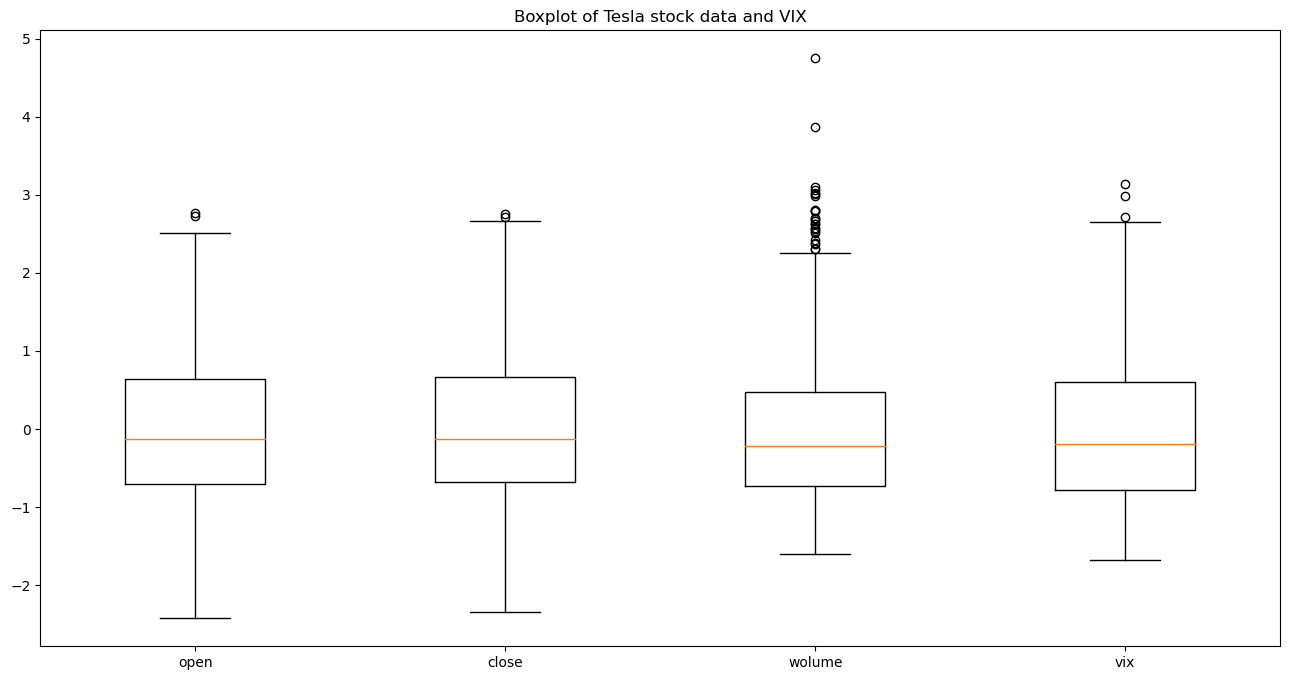

In [36]:
fig = plt.figure(figsize = (16,8))
bxplt = plt.subplot()
bxplt.set_title('Boxplot of Tesla stock data and VIX')
bxplt.boxplot(st_scaled)
plt.xticks([1,2,3,4], ['open', 'close', 'wolume', 'vix'])
#plt.xlabel('Category')
#plt.ylabel('Price')
#fig.savefig("boxpot.png")
plt.show()

## Plot the Correlation Heatmap

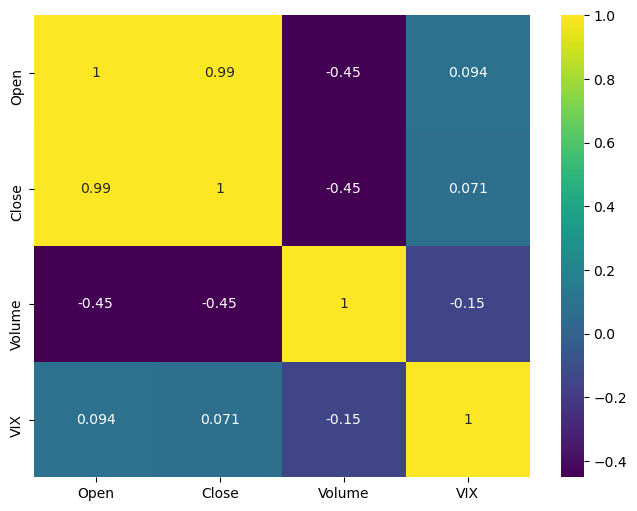

In [38]:
fig = plt.figure(figsize= (8,6))
sns.heatmap(st.corr(), cmap="viridis", annot=True)
#fig.savefig('correlation_heatmap.png')
plt.show()

## Plot the time series 

<Figure size 1600x1600 with 0 Axes>

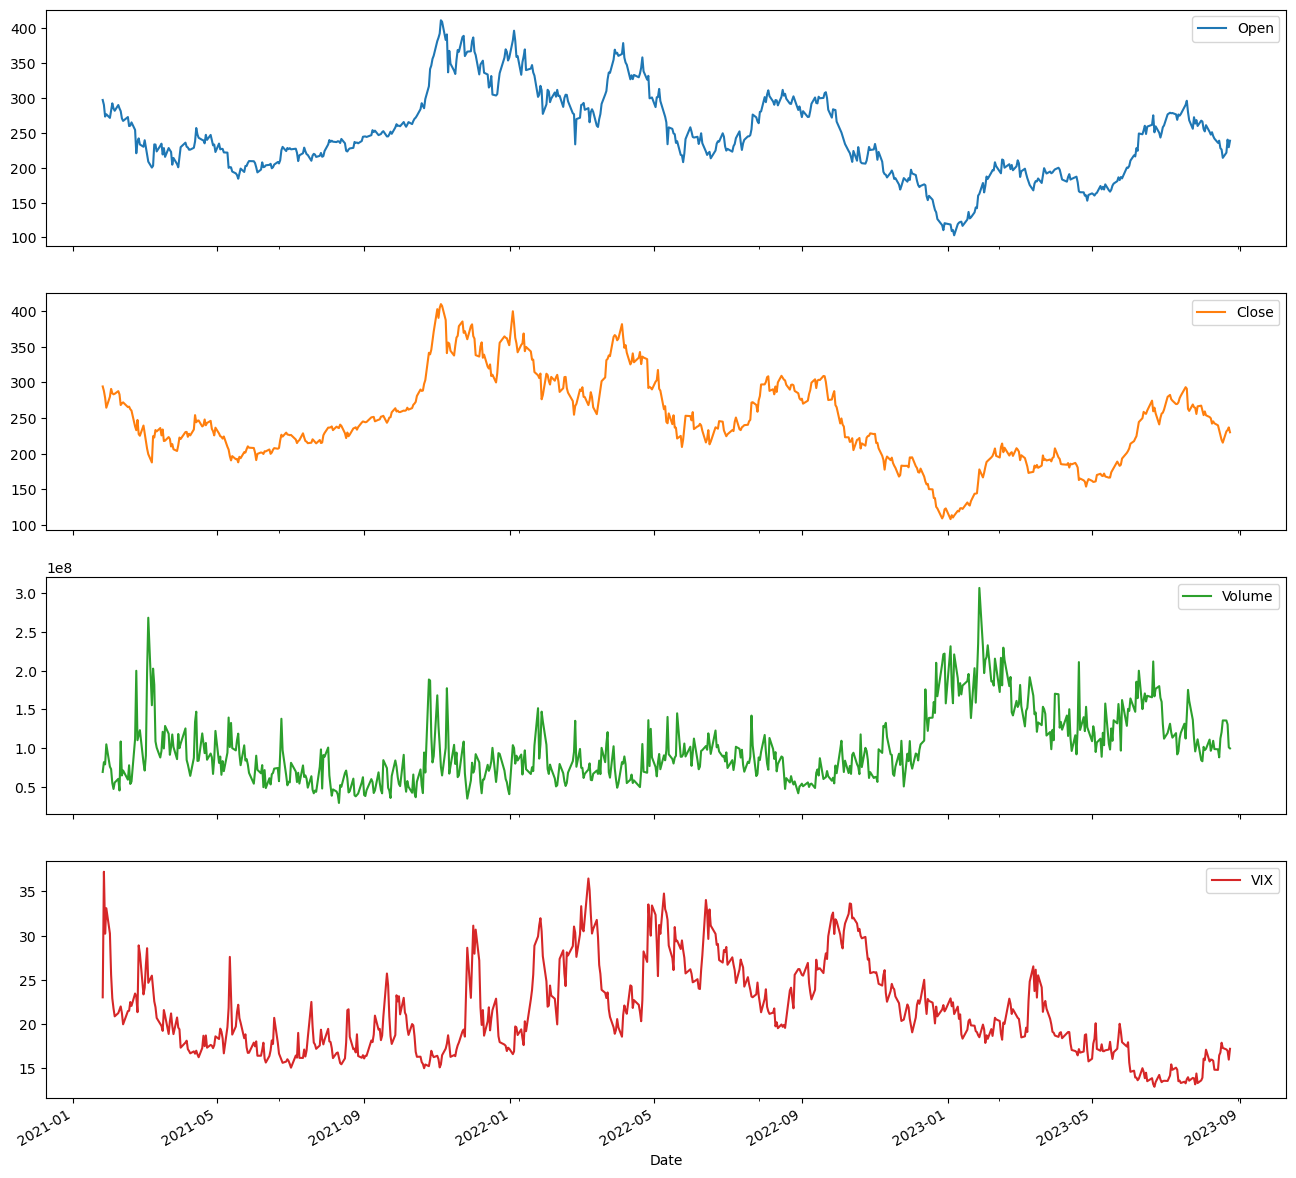

In [39]:
fig = plt.figure(figsize = (16, 16))
st.plot(subplots = True, figsize = (16,16))
#fig.savefig('timeseries.png')
plt.show()

## Plot moving averages

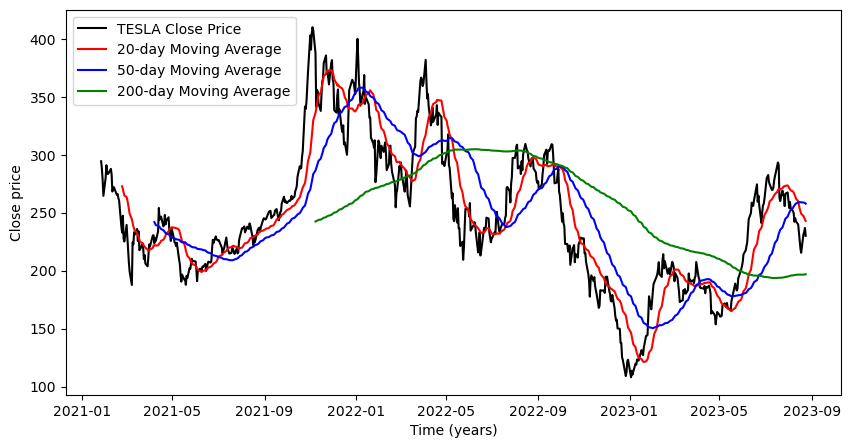

In [40]:
df = data.copy() # data was the stock price of TESLA
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()
df['MA_200'] = df['Close'].rolling(200).mean()

fig = plt.figure(figsize=(10,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'k',label=['TESLA Close Price'])
plt.plot(df['MA_20'],'r', label=['20-day MA'])
plt.plot(df['MA_50'],'b', label=['50-day MA'])
plt.plot(df['MA_200'],'g', label=['200-day MA'])
plt.legend(['TESLA Close Price', '20-day Moving Average','50-day Moving Average', '200-day Moving Average'], loc='upper left')
plt.title('')
plt.xlabel('Time (years)')
plt.ylabel('Close price')
#sns.set_style("whitegrid")
#fig.savefig('original_data_plus_moving_averages.png',dpi=600)
plt.show()

 <h1 style="color:red;">  Stopped here on thursday Jan 25  </h1>

## Machine failure data

In [41]:
mf= "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df_mf = pd.read_csv(mf, header = 0)
#df_mf.to_csv('df_mf.csv', header=True, index=None)


In [42]:
df_mf.info() #indicates the column name, number of filled values, and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [43]:
df_mf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M               298.10                   308.60   
1    2     L47181    L               298.20                   308.70   
2    3     L47182    L               298.10                   308.50   
3    4     L47183    L               298.20                   308.60   
4    5     L47184    L               298.20                   308.70   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551        42.80                0                0    0   
1                    1408        46.30                3                0    0   
2                    1498        49.40                5                0    0   
3                    1433        39.50                7                0    0   
4                    1408        40.00                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [44]:
df_mf.describe()
#with pd.option_context('float_format', '{:.2f}'.format): print(df_mf.describe())

UDI  Air temperature [K]  Process temperature [K]  \
count 10,000.00            10,000.00                10,000.00   
mean   5,000.50               300.00                   310.01   
std    2,886.90                 2.00                     1.48   
min        1.00               295.30                   305.70   
25%    2,500.75               298.30                   308.80   
50%    5,000.50               300.10                   310.10   
75%    7,500.25               301.50                   311.10   
max   10,000.00               304.50                   313.80   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
count               10,000.00    10,000.00        10,000.00        10,000.00   
mean                 1,538.78        39.99           107.95             0.03   
std                    179.28         9.97            63.65             0.18   
min                  1,168.00         3.80             0.00             0.00   
25%                  1,423.00        33.20            53.00             0.00   
50%                  1,503.00        40.10           108.00             0.00   
75%                  1,612.00        46.80           162.00             0.00   
max                  2,886.00        76.60           253.00             1.00   

            TWF       HDF       PWF       OSF       RNF  
count 10,000.00 10,000.00 10,000.00 10,000.00 10,000.00  
mean       0.00      0.01      0.01      0.01      0.00  
std        0.07      0.11      0.10      0.10      0.04  
min        0.00      0.00      0.00      0.00      0.00  
25%        0.00      0.00      0.00      0.00      0.00  
50%        0.00      0.00      0.00      0.00      0.00  
75%        0.00      0.00      0.00      0.00      0.00  
max        1.00      1.00      1.00      1.00      1.00

<Axes: >

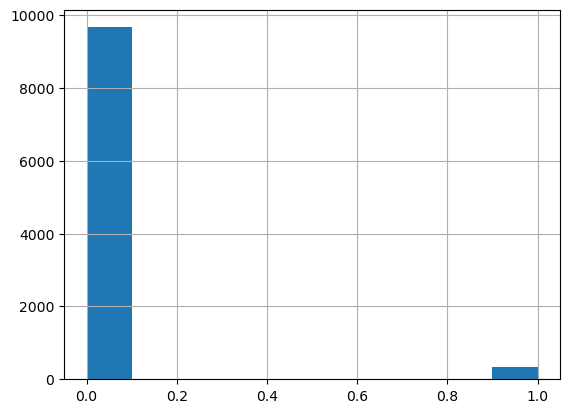

In [45]:
df_mf['Machine failure'].hist()

In [46]:
df_mf[df_mf['Machine failure']==1].count()

UDI                        339
Product ID                 339
Type                       339
Air temperature [K]        339
Process temperature [K]    339
Rotational speed [rpm]     339
Torque [Nm]                339
Tool wear [min]            339
Machine failure            339
TWF                        339
HDF                        339
PWF                        339
OSF                        339
RNF                        339
dtype: int64

In [47]:
df_mf[df_mf['Machine failure']==0].count()

UDI                        9661
Product ID                 9661
Type                       9661
Air temperature [K]        9661
Process temperature [K]    9661
Rotational speed [rpm]     9661
Torque [Nm]                9661
Tool wear [min]            9661
Machine failure            9661
TWF                        9661
HDF                        9661
PWF                        9661
OSF                        9661
RNF                        9661
dtype: int64

In [48]:
# #import LabelEncoder library 
# from sklearn.preprocessing import LabelEncoder

# # Assigning numerical values and storing in another column
# df_mf = df_mf.apply(LabelEncoder().fit_transform)
# df_mf.head()


#Use this if you like to create dummies instead

#We can use drop_first = True to create k-1 dummies for k categories or manually drop one set later
dummies = pd.get_dummies(df_mf['Type']) 
dummies.head()

H      L      M
0  False  False   True
1  False   True  False
2  False   True  False
3  False   True  False
4  False   True  False

In [49]:
df_mf = pd.concat([df_mf, dummies], axis = 1)

In [50]:
df_mf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M               298.10                   308.60   
1    2     L47181    L               298.20                   308.70   
2    3     L47182    L               298.10                   308.50   
3    4     L47183    L               298.20                   308.60   
4    5     L47184    L               298.20                   308.70   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551        42.80                0                0    0   
1                    1408        46.30                3                0    0   
2                    1498        49.40                5                0    0   
3                    1433        39.50                7                0    0   
4                    1408        40.00                9                0    0   

   HDF  PWF  OSF  RNF      H      L      M  
0    0    0    0    0  False  False   True  
1    0    0    0    0  False   True  False  
2    0    0    0    0  False   True  False  
3    0    0    0    0  False   True  False  
4    0    0    0    0  False   True  False

In [51]:
#using columns locations
#df_mf = df_mf.drop(df_mf.iloc[:,[0,1,2,]], axis =1)

#using column names
df_mf = df_mf.drop(['UDI','Product ID', 'Type',], axis = 1) 
df_mf.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0               298.10                   308.60                    1551   
1               298.20                   308.70                    1408   
2               298.10                   308.50                    1498   
3               298.20                   308.60                    1433   
4               298.20                   308.70                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0        42.80                0                0    0    0    0    0    0   
1        46.30                3                0    0    0    0    0    0   
2        49.40                5                0    0    0    0    0    0   
3        39.50                7                0    0    0    0    0    0   
4        40.00                9                0    0    0    0    0    0   

       H      L      M  
0  False  False   True  
1  False   True  False  
2  False   True  False  
3  False   True  False  
4  False   True  False

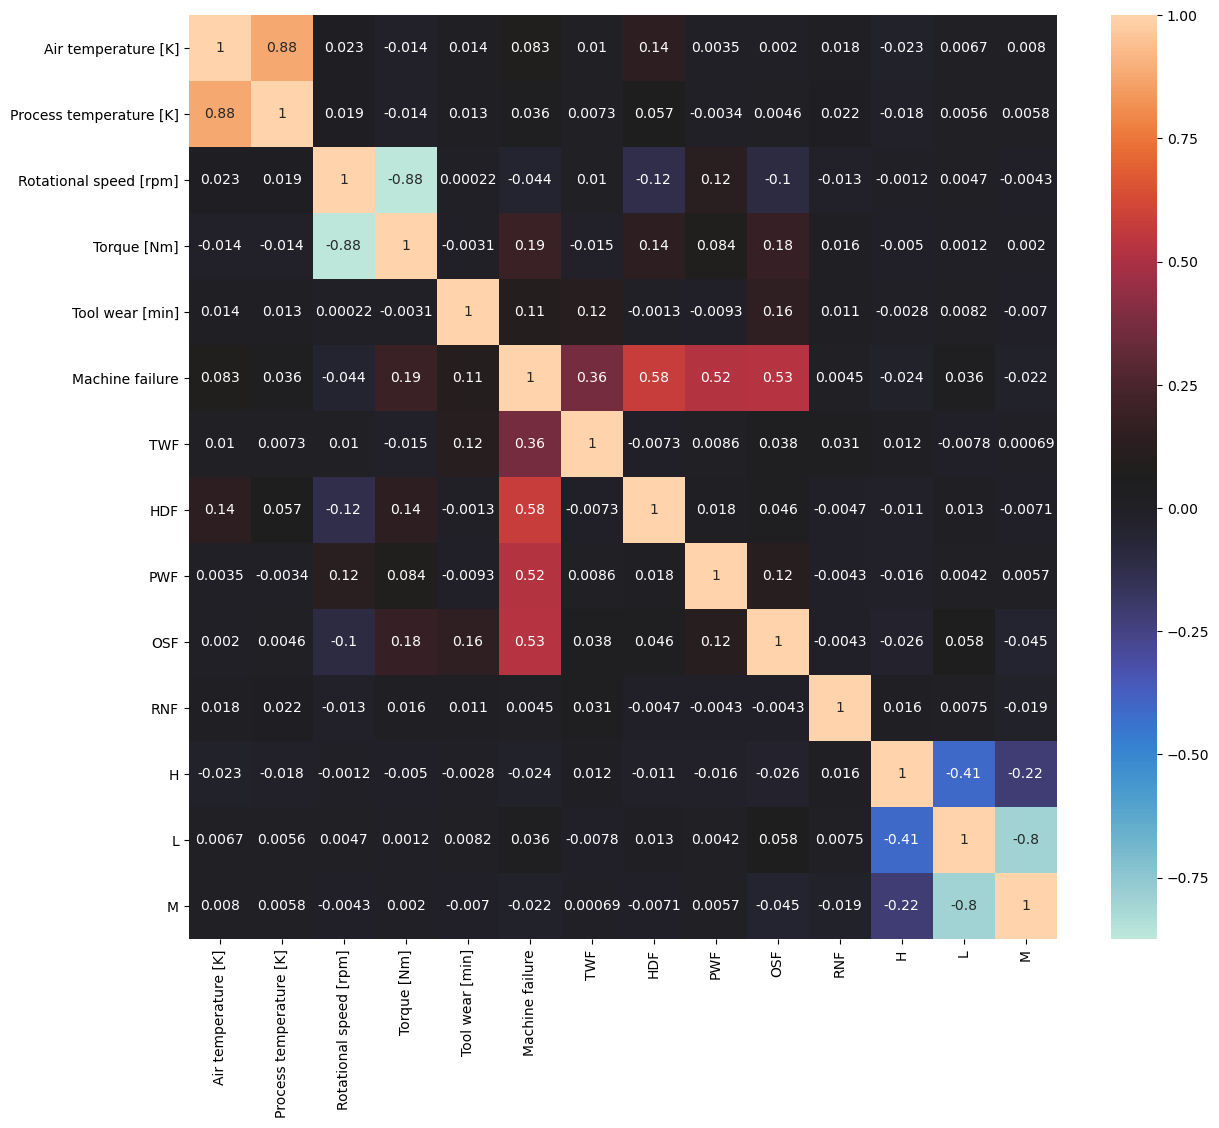

In [52]:
fig = plt.figure(figsize= (14,12))
sns.heatmap(df_mf.corr(),cmap="icefire", annot=True)
plt.show() ## to save figure use fig.savefig('mf_correlation_heatmap.png')

## Bad Dog Data (obtained from Dr. Apigian)

#To read the data
https://pandas.pydata.org/pandas-docs/stable/api.html#flat-file

In [53]:
bd = pd.read_csv('Data_Sets/BadDogContinuing.csv', index_col = 0, header=0) 
#index_col = 0 sets the first column to the index
# header=0 sets the top row as the header

### 1) For the  initial exploration of  Data
- head( )
- tail( )
- sample( )
- info( )
- describe( )

In [54]:
bd.head()

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00   
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00   
201602130            smarsh@me.com     0.00        0.00   201.12  0.00   
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00   
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201500660    4.00   Casual Visitor             $400-800k  Continuing   
201602818    1.00   Casual Visitor           Below $100k  Continuing   
201602130    1.00   Casual Visitor             $100-200k  Continuing   
201600192    0.00    Luxury Estate            $800-1200k  Continuing   
201500143    2.00   Casual Visitor             $200-400k  Continuing   

                  Date  
Member ID               
201500660  1/1/20 1:12  
201602818  1/1/20 3:20  
201602130  1/1/20 4:35  
201600192  1/1/20 7:11  
201500143  1/1/20 7:12

In [55]:
bd.sample(10) #A random sample of 10 rows

Email Address  Website  Newsletter  Tasting   Call  Visits  \
Member ID                                                                     
201600949       lbeck@juno.com     0.00       10.82   289.92   0.00    4.00   
201604076     weaverp@juno.com     0.00        0.00     0.00 144.80    0.00   
201400546   aalvarado9@msn.com     0.00       44.91   383.22   0.00    3.00   
201602514       thom47@msn.com     0.00      303.33     0.00   0.00    0.00   
201601728   klewis@charter.net     0.00        0.00   329.89   0.00    2.00   
201600402  garcia1@charter.net    42.96       26.45   527.23   0.00    3.00   
201600298      garcia2@att.net     0.00        0.00     0.00 475.77    0.00   
201500544    b.kaiser@mail.com     0.00        0.00   131.75   0.00    1.00   
201601888        rand25@me.com     0.00        0.00   305.03   0.00    1.00   
201603583    enrm16@google.com     0.00      106.18     0.00   0.00    0.00   

          Customer_Segment Wealth Range Estimate      Status           Date  
Member ID                                                                    
201600949   Casual Visitor             $400-800k  Continuing  8/15/20 14:58  
201604076      High Roller             $400-800k  Continuing  2/28/20 22:28  
201400546   Casual Visitor             $400-800k  Continuing   3/16/20 9:16  
201602514    Luxury Estate            $800-1200k  Continuing   1/26/20 0:13  
201601728   Casual Visitor             $100-200k  Continuing   8/26/20 2:25  
201600402   Casual Visitor             $400-800k  Continuing   7/1/20 18:57  
201600298      High Roller             $400-800k  Continuing   5/29/20 2:27  
201500544   Casual Visitor             $100-200k  Continuing   3/3/20 15:25  
201601888  Wine Enthusiast             $100-200k  Continuing  10/5/20 18:46  
201603583    Luxury Estate             $400-800k  Continuing  5/21/20 10:12

In [56]:
bd.tail(8) #shows last 8 rows

Email Address  Website  Newsletter  Tasting  Call  Visits  \
Member ID                                                                     
201501491    syla57@charter.net     0.00        0.00   260.94  0.00    1.00   
201600186    jcantrell2@gmx.com     0.00        0.00   436.65  0.00    3.00   
201500550  d.heath@facebook.com     0.00        0.00    80.80  0.00    3.00   
201500067         jwal2@msn.com     0.00        0.00   629.53  0.00    4.00   
201500301       crivera@mac.com     0.00      685.38     0.00  0.00    0.00   
201603872      emiller6@att.net     0.00        0.00   120.28  0.00    3.00   
201400272      hmolina3@gmx.com    71.17        0.00    66.96  0.00    1.00   
201400019     garcia9@gmail.com     0.00        0.00   247.84  0.00    2.00   

          Customer_Segment Wealth Range Estimate      Status            Date  
Member ID                                                                     
201501491  Wine Enthusiast             $100-200k  Continuing  10/11/20 18:06  
201600186   Casual Visitor             $200-400k  Continuing  10/11/20 18:49  
201500550   Casual Visitor             $200-400k  Continuing  10/11/20 19:17  
201500067   Casual Visitor             $200-400k  Continuing  10/11/20 19:30  
201500301    Luxury Estate            $800-1200k  Continuing  10/11/20 23:13  
201603872   Casual Visitor             $200-400k  Continuing  10/11/20 23:15  
201400272  Wine Enthusiast             $200-400k         NaN   4/19/20 15:18  
201400019   Casual Visitor             $200-400k         NaN   7/12/20 12:47

In [57]:
bd.info() #indicates the column name, number of filled values, and data type

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 201500660 to 201400019
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          5500 non-null   object 
 1   Website                5499 non-null   float64
 2   Newsletter             5499 non-null   float64
 3   Tasting                5499 non-null   float64
 4   Call                   5499 non-null   float64
 5   Visits                 5499 non-null   float64
 6   Customer_Segment       5498 non-null   object 
 7   Wealth Range Estimate  5500 non-null   object 
 8   Status                 5498 non-null   object 
 9   Date                   5500 non-null   object 
dtypes: float64(5), object(5)
memory usage: 472.7+ KB


### 2) Slice and Filter Data

In [58]:
bd[['Website']].head()
#bd['Website'].head()

Website
Member ID         
201500660     0.00
201602818     0.00
201602130     0.00
201600192     0.00
201500143     0.00

In [59]:
bd.iloc[:, [1]].head()

Website
Member ID         
201500660     0.00
201602818     0.00
201602130     0.00
201600192     0.00
201500143     0.00

In [60]:
bd.iloc[:, [1, 2, 4]].head()

Website  Newsletter  Call
Member ID                           
201500660     0.00       79.26  0.00
201602818     0.00        0.00  0.00
201602130     0.00        0.00  0.00
201600192     0.00      383.51  0.00
201500143     0.00        0.00  0.00

In [61]:
bd_cus = bd.iloc[:, [0, 1, 2, 3, 4]]
bd_cus.head()

Email Address  Website  Newsletter  Tasting  Call
Member ID                                                             
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00
201602130            smarsh@me.com     0.00        0.00   201.12  0.00
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00

In [62]:
 bd.iloc[0:5, [0, 1, 2, 3, 4 ]]#select first five rows of columns0, 1, 2, 3, 4 of bd data

Email Address  Website  Newsletter  Tasting  Call
Member ID                                                             
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00
201602130            smarsh@me.com     0.00        0.00   201.12  0.00
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00

## XXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXXX
### 3) Explore the data

- Describe
- Groupby
- plot with MatPlotLib
- plot with Seaborn

In [63]:
bd.describe()

Website  Newsletter  Tasting     Call   Visits
count 5,499.00    5,499.00 5,499.00 5,499.00 5,499.00
mean     36.21       59.22   211.51    24.04     1.87
std     162.29      152.48   384.92   106.22     1.48
min       0.00        0.00     0.00     0.00     0.00
25%       0.00        0.00    38.26     0.00     1.00
50%       0.00        0.00   147.91     0.00     2.00
75%       0.00       37.34   290.35     0.00     3.00
max   2,924.43    1,512.44 6,964.53 1,258.64    10.00

In [64]:
bd.groupby('Customer_Segment').count()

Email Address  Website  Newsletter  Tasting  Call  Visits  \
Customer_Segment                                                              
Casual Visitor             3917     3917        3917     3917  3917    3917   
High Roller                 275      275         275      275   275     275   
Luxury Estate               853      853         853      853   853     853   
Wine Enthusiast             453      453         453      453   453     453   

                  Wealth Range Estimate  Status  Date  
Customer_Segment                                       
Casual Visitor                     3917    3916  3917  
High Roller                         275     275   275  
Luxury Estate                       853     853   853  
Wine Enthusiast                     453     452   453

In [65]:
bd.groupby('Wealth Range Estimate')[['Website', 'Newsletter','Tasting','Call','Visits']].mean()

Website  Newsletter  Tasting   Call  Visits
Wealth Range Estimate                                             
$100-200k                30.32        0.00   150.81   0.00    1.35
$1200-1800k             280.15      433.73   663.80 152.49    2.19
$200-400k                21.29        5.32   237.74   0.78    2.38
$400-800k                28.83       84.66   231.68  76.48    2.19
$800-1200k               71.46      290.63    84.40  25.75    0.39
Above $1800k            624.04      670.66 1,312.15 254.45    4.40
Below $100k               0.00        0.00   109.97   0.00    1.00

### Change datatypes

https://pbpython.com/pandas_dtypes.html

In [ ]:
#will throw an error because of a NaN

#bd['Visits'] = bd['Visits'].astype('int64') 

In [66]:
bd_data = bd.dropna(how='any') #cannot have NaNs afterwards

bd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5496 entries, 201500660 to 201603872
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          5496 non-null   object 
 1   Website                5496 non-null   float64
 2   Newsletter             5496 non-null   float64
 3   Tasting                5496 non-null   float64
 4   Call                   5496 non-null   float64
 5   Visits                 5496 non-null   float64
 6   Customer_Segment       5496 non-null   object 
 7   Wealth Range Estimate  5496 non-null   object 
 8   Status                 5496 non-null   object 
 9   Date                   5496 non-null   object 
dtypes: float64(5), object(5)
memory usage: 472.3+ KB


In [67]:
bd_data['Visits'] = bd_data['Visits'].astype('int64') 

In [68]:
bd_data.head()

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00   
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00   
201602130            smarsh@me.com     0.00        0.00   201.12  0.00   
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00   
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201500660       4   Casual Visitor             $400-800k  Continuing   
201602818       1   Casual Visitor           Below $100k  Continuing   
201602130       1   Casual Visitor             $100-200k  Continuing   
201600192       0    Luxury Estate            $800-1200k  Continuing   
201500143       2   Casual Visitor             $200-400k  Continuing   

                  Date  
Member ID               
201500660  1/1/20 1:12  
201602818  1/1/20 3:20  
201602130  1/1/20 4:35  
201600192  1/1/20 7:11  
201500143  1/1/20 7:12

### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
### 4. Change Objects to Dates
This section changes the columns from an object to a date.
 - bd['Date'] = pd.to_datetime(bd['Date'])
 - bd['Day'] 
 - bd['month'] 
 - bd['year'] 
 - bd['day_of_week'] 

In [69]:
import datetime as dt

In [70]:
# Dates for Status
bd['Date'] = pd.to_datetime(bd['Date'])

bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 201500660 to 201400019
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Email Address          5500 non-null   object        
 1   Website                5499 non-null   float64       
 2   Newsletter             5499 non-null   float64       
 3   Tasting                5499 non-null   float64       
 4   Call                   5499 non-null   float64       
 5   Visits                 5499 non-null   float64       
 6   Customer_Segment       5498 non-null   object        
 7   Wealth Range Estimate  5500 non-null   object        
 8   Status                 5498 non-null   object        
 9   Date                   5500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 472.7+ KB


In [71]:
bd.head()

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00   
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00   
201602130            smarsh@me.com     0.00        0.00   201.12  0.00   
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00   
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201500660    4.00   Casual Visitor             $400-800k  Continuing   
201602818    1.00   Casual Visitor           Below $100k  Continuing   
201602130    1.00   Casual Visitor             $100-200k  Continuing   
201600192    0.00    Luxury Estate            $800-1200k  Continuing   
201500143    2.00   Casual Visitor             $200-400k  Continuing   

                         Date  
Member ID                      
201500660 2020-01-01 01:12:00  
201602818 2020-01-01 03:20:00  
201602130 2020-01-01 04:35:00  
201600192 2020-01-01 07:11:00  
201500143 2020-01-01 07:12:00

In [72]:
bd['Day'] = bd['Date'].dt.dayofweek
bd['month'] = bd['Date'].dt.month
bd['year'] = bd['Date'].dt.year
bd['day_of_week'] = bd['Date'].dt.day_name()

In [73]:
bd.sample(10)

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                 
201603152    jevans4@googlemail.com     0.00        0.00   372.89  0.00   
201601864    sstrong7@sbcglobal.net   232.12      100.83     0.00  0.00   
201500584        gomezd@verizon.net     0.00        0.00    24.00  0.00   
201602408     berickson@comcast.net     0.00        0.00   182.97  0.00   
201600252  campbellt@googlemail.com    70.28        0.00   138.29  0.00   
201601526          hspe91@gmail.com   224.81      576.99     0.00 35.19   
201600456      bradya@earthlink.net     0.00        0.00   223.64  0.00   
201601924         tspencer2@gmx.com     0.00        0.00   192.68  0.00   
201502250        tram48@verizon.net   103.00       94.29    24.00  0.00   
201601197            albw87@gmx.com     0.00        0.00   162.65  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201603152    2.00   Casual Visitor             $100-200k  Continuing   
201601864    0.00  Wine Enthusiast             $200-400k  Continuing   
201500584    1.00   Casual Visitor             $100-200k  Continuing   
201602408    2.00   Casual Visitor             $200-400k  Continuing   
201600252    4.00   Casual Visitor             $400-800k  Continuing   
201601526    0.00    Luxury Estate           $1200-1800k  Continuing   
201600456    2.00   Casual Visitor             $100-200k  Continuing   
201601924    1.00   Casual Visitor             $100-200k  Continuing   
201502250    4.00   Casual Visitor             $400-800k  Continuing   
201601197    2.00   Casual Visitor             $100-200k  Continuing   

                         Date  Day  month  year day_of_week  
Member ID                                                    
201603152 2020-03-22 02:27:00    6      3  2020      Sunday  
201601864 2020-05-26 19:43:00    1      5  2020     Tuesday  
201500584 2020-06-29 05:02:00    0      6  2020      Monday  
201602408 2020-02-13 22:00:00    3      2  2020    Thursday  
201600252 2020-09-19 11:38:00    5      9  2020    Saturday  
201601526 2020-10-06 09:20:00    1     10  2020     Tuesday  
201600456 2020-08-25 03:45:00    1      8  2020     Tuesday  
201601924 2020-06-14 14:51:00    6      6  2020      Sunday  
201502250 2020-01-23 22:07:00    3      1  2020    Thursday  
201601197 2020-06-20 19:13:00    5      6  2020    Saturday

### 5) Melting and Pivoting

### Melting
- set dataset
- set variables to include that are not melted - id_vars
- melt variable - value_vars

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html <br>

In [74]:
bd_cus.head()

Email Address  Website  Newsletter  Tasting  Call
Member ID                                                             
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00
201602130            smarsh@me.com     0.00        0.00   201.12  0.00
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00

In [75]:
bd_melt = pd.melt(bd_cus, id_vars=['Email Address'], \
                 value_vars=['Website', 'Newsletter', 'Tasting', 'Call'])

In [76]:
bd_melt.sample(10)

Email Address    variable  value
15292          eparker@aol.com     Tasting 247.89
16136           wolfem@att.net     Tasting 219.11
4823          rpatel2@juno.com     Website   0.00
4932   c.stewart@earthlink.net     Website   0.00
14339           katw87@gmx.com     Tasting 275.41
4567           church7@mac.com     Website   0.00
7593           white3@juno.com  Newsletter 123.48
19870    d.johnson@hotmail.com        Call   0.00
10223        pdickson3@att.net  Newsletter   0.00
15976    mgarcia@bellsouth.net     Tasting 348.44

In [77]:
bd_melt.head()

Email Address variable  value
0    wpet15@googlemail.com  Website   0.00
1      brooksb@charter.net  Website   0.00
2            smarsh@me.com  Website   0.00
3  v.daniels@sbcglobal.net  Website   0.00
4       elsv34@comcast.net  Website   0.00

In [78]:
bd_melt.describe()

value
count 21,996.00
mean      82.75
std      240.70
min        0.00
25%        0.00
50%        0.00
75%       83.31
max    6,964.53

In [79]:
bd_melt.groupby('variable').count()

Email Address  value
variable                        
Call                 5500   5499
Newsletter           5500   5499
Tasting              5500   5499
Website              5500   5499

In [81]:
bd_melt=bd_melt.rename(columns = {'variable':'Type', 'value': 'Sales'})

In [82]:
bd_melt.sample(10)

Email Address        Type  Sales
18758   dfranklin@yahoo.com        Call   0.00
15896      murray1@juno.com     Tasting 142.54
6921   t.smith@facebook.com  Newsletter   0.00
7285     r.johnson@mail.com  Newsletter 124.42
5707         plop40@att.net  Newsletter   0.00
18286   wayh18@facebook.com        Call   0.00
13961     a.rogers@live.com     Tasting 258.51
168          emoo35@cox.net     Website   0.00
17012         bric83@me.com        Call   0.00
2683     mosborn6@yahoo.com     Website   0.00


### Pivot

- Take one column and expand it to multiple columns
- pivot = df.pivot(index='index', columns='categorical value', values='numerical value')
- set index as an identifier
- set the columns to the column that has the different categories that will be your headers
- set the values to a specific numerical column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html

In [83]:
bd_pivot = bd_melt.pivot(index='Email Address', columns='Type', values='Sales')

In [85]:
bd_pivot.head()

Type                  Call  Newsletter  Tasting  Website
Email Address                                           
a.alvarado@msn.com    0.00      252.47     0.00     0.00
a.armstrong@live.com  0.00       42.09   641.11   125.03
a.black@hotmail.com   0.00       55.84     0.00     0.00
a.blackwell@aol.com   0.00        0.00   570.55     0.00
a.bradshaw@aol.com    0.00        0.00   375.81     0.00

## XXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXX
### 6)  Merge Data

In [86]:
## Concatenate
bd_cont = pd.read_csv('Data_Sets/BadDogContinuing.csv', index_col = 0, header=0)
bd_ex = pd.read_csv('Data_Sets/BadDog2019.csv', index_col = 0, header=0)

bd_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 201500660 to 201400019
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          5500 non-null   object 
 1   Website                5499 non-null   float64
 2   Newsletter             5499 non-null   float64
 3   Tasting                5499 non-null   float64
 4   Call                   5499 non-null   float64
 5   Visits                 5499 non-null   float64
 6   Customer_Segment       5498 non-null   object 
 7   Wealth Range Estimate  5500 non-null   object 
 8   Status                 5498 non-null   object 
 9   Date                   5500 non-null   object 
dtypes: float64(5), object(5)
memory usage: 472.7+ KB


In [87]:
bd_ex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496 entries, 201600644 to 201502388
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          1496 non-null   object 
 1   Website                1495 non-null   float64
 2   Newsletter             1493 non-null   float64
 3   Tasting                1494 non-null   float64
 4   Call                   1495 non-null   float64
 5   Visits                 1495 non-null   float64
 6   Customer_Segment       1495 non-null   object 
 7   Wealth Range Estimate  1496 non-null   object 
 8   Status                 1496 non-null   object 
 9   Date                   1496 non-null   object 
dtypes: float64(5), object(5)
memory usage: 128.6+ KB


In [88]:
bd_all = pd.concat([bd_cont, bd_ex], axis=0)

bd_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 201500660 to 201502388
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6993 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6996 non-null   object 
dtypes: float64(5), object(5)
memory usage: 601.2+ KB


In [89]:
bd_all.head()

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00   
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00   
201602130            smarsh@me.com     0.00        0.00   201.12  0.00   
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00   
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201500660    4.00   Casual Visitor             $400-800k  Continuing   
201602818    1.00   Casual Visitor           Below $100k  Continuing   
201602130    1.00   Casual Visitor             $100-200k  Continuing   
201600192    0.00    Luxury Estate            $800-1200k  Continuing   
201500143    2.00   Casual Visitor             $200-400k  Continuing   

                  Date  
Member ID               
201500660  1/1/20 1:12  
201602818  1/1/20 3:20  
201602130  1/1/20 4:35  
201600192  1/1/20 7:11  
201500143  1/1/20 7:12

## Merge Data
Pandas merge function provides standard database join operations between DataFrame objects.

|Merge Method| Description|
|---|---|
|left|Use keys from left frame only|
|right|Use keys from right frame only|
|outer|Use union of keys from both frames|
|inner|Use intersection of keys from both frames|

![alt text](images/Pandas_Merge.png )

![alt text](images/PandasMergeTypes.png "Types")

In [90]:
bd_marketing = pd.read_table('Data_Sets/BadDogMarketing.txt', header=0, sep='\t')

bd_marketing

Customer_Segment  CS_Index  Marketing
0   Casual Visitor         1      Email
1      High Roller         2  Concierge
2    Luxury Estate         3  Concierge
3  Wine Enthusiast         4      Email

In [91]:
bd_all.head()

Email Address  Website  Newsletter  Tasting  Call  \
Member ID                                                                
201500660    wpet15@googlemail.com     0.00       79.26   257.91  0.00   
201602818      brooksb@charter.net     0.00        0.00   173.68  0.00   
201602130            smarsh@me.com     0.00        0.00   201.12  0.00   
201600192  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00   
201500143       elsv34@comcast.net     0.00        0.00    62.37  0.00   

           Visits Customer_Segment Wealth Range Estimate      Status  \
Member ID                                                              
201500660    4.00   Casual Visitor             $400-800k  Continuing   
201602818    1.00   Casual Visitor           Below $100k  Continuing   
201602130    1.00   Casual Visitor             $100-200k  Continuing   
201600192    0.00    Luxury Estate            $800-1200k  Continuing   
201500143    2.00   Casual Visitor             $200-400k  Continuing   

                  Date  
Member ID               
201500660  1/1/20 1:12  
201602818  1/1/20 3:20  
201602130  1/1/20 4:35  
201600192  1/1/20 7:11  
201500143  1/1/20 7:12

In [92]:
bd_merge = pd.merge(bd_all, bd_marketing, how='left', on='Customer_Segment')

bd_merge.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6993 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6996 non-null   object 
 10  CS_Index               6993 non-null   float64
 11  Marketing              6993 non-null   object 
dtypes: float64(6), object(6)
memory usage: 656.0+ KB


In [93]:
bd_merge.head()

Email Address  Website  Newsletter  Tasting  Call  Visits  \
0    wpet15@googlemail.com     0.00       79.26   257.91  0.00    4.00   
1      brooksb@charter.net     0.00        0.00   173.68  0.00    1.00   
2            smarsh@me.com     0.00        0.00   201.12  0.00    1.00   
3  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00    0.00   
4       elsv34@comcast.net     0.00        0.00    62.37  0.00    2.00   

  Customer_Segment Wealth Range Estimate      Status         Date  CS_Index  \
0   Casual Visitor             $400-800k  Continuing  1/1/20 1:12      1.00   
1   Casual Visitor           Below $100k  Continuing  1/1/20 3:20      1.00   
2   Casual Visitor             $100-200k  Continuing  1/1/20 4:35      1.00   
3    Luxury Estate            $800-1200k  Continuing  1/1/20 7:11      3.00   
4   Casual Visitor             $200-400k  Continuing  1/1/20 7:12      1.00   

   Marketing  
0      Email  
1      Email  
2      Email  
3  Concierge  
4      Email


## XXXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXX
### 7) Cleanse Data

###  Missing Data


#### What can you do with missing data?  (NaN)
- **Leave as-is**
- **Drop them**
    - df_dropped = df_nan.dropna() 
- **Fill missing value**
    - Fill with a value 
        - df_nan['sex'] = df_nan['sex'].fillna('missing')
        - df_nan[['total_bill', 'size']] = tips_nan[['total_bill','size']].fillna(0)
    - Fill with a summary statistic
        - mean_value = df_nan['tip'].mean()
        - df_nan['tip'] = df_nan['tip'].fillna(mean_value)
    - Fill in with Forward or backward
        - df.fillna(method='ffill')
        - df.fillna(method='bfill')
        


http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html

### DropNA
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


### axis determine if rows or columns which contain missing values are removed, the default is 0
- ** axis = 0, or ‘index’ : Drop rows which contain missing values.
- ** axis = 1, or ‘columns’ : Drop columns which contain missing value.

- ** how = ‘any’ : If any NA values are present, drop that row or column
- ** how = ‘all’ : If all values are NA, drop that row or column

In [94]:
bd_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6993 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6996 non-null   object 
 10  CS_Index               6993 non-null   float64
 11  Marketing              6993 non-null   object 
dtypes: float64(6), object(6)
memory usage: 656.0+ KB


In [95]:
bd_all = bd_merge.dropna(how='all')

bd_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6993 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6996 non-null   object 
 10  CS_Index               6993 non-null   float64
 11  Marketing              6993 non-null   object 
dtypes: float64(6), object(6)
memory usage: 656.0+ KB


In [96]:
bd_any = bd_merge.dropna(how='any')

bd_any.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6989 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6989 non-null   object 
 1   Website                6989 non-null   float64
 2   Newsletter             6989 non-null   float64
 3   Tasting                6989 non-null   float64
 4   Call                   6989 non-null   float64
 5   Visits                 6989 non-null   float64
 6   Customer_Segment       6989 non-null   object 
 7   Wealth Range Estimate  6989 non-null   object 
 8   Status                 6989 non-null   object 
 9   Date                   6989 non-null   object 
 10  CS_Index               6989 non-null   float64
 11  Marketing              6989 non-null   object 
dtypes: float64(6), object(6)
memory usage: 709.8+ KB


In [97]:
bd_thresh = bd_merge.dropna(thresh=2)

bd_thresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6993 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6996 non-null   object 
 10  CS_Index               6993 non-null   float64
 11  Marketing              6993 non-null   object 
dtypes: float64(6), object(6)
memory usage: 656.0+ KB


In [98]:
bd_status = bd_merge.dropna(subset=['Status'])

bd_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6994 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6994 non-null   object 
 1   Website                6992 non-null   float64
 2   Newsletter             6990 non-null   float64
 3   Tasting                6991 non-null   float64
 4   Call                   6992 non-null   float64
 5   Visits                 6992 non-null   float64
 6   Customer_Segment       6991 non-null   object 
 7   Wealth Range Estimate  6994 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6994 non-null   object 
 10  CS_Index               6991 non-null   float64
 11  Marketing              6991 non-null   object 
dtypes: float64(6), object(6)
memory usage: 710.3+ KB


In [99]:
## Fill in with a value

bd_merge.Customer_Segment.value_counts(dropna=False)

Customer_Segment
Casual Visitor     4985
Luxury Estate      1048
Wine Enthusiast     581
High Roller         379
NaN                   3
Name: count, dtype: int64

In [100]:
bd_merge['Customer_Segment'] = bd_merge['Customer_Segment'].fillna('Casual Visitor')

In [101]:
bd_merge.Customer_Segment.value_counts(dropna=False)

Customer_Segment
Casual Visitor     4988
Luxury Estate      1048
Wine Enthusiast     581
High Roller         379
Name: count, dtype: int64

In [102]:
bd_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6996 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6994 non-null   object 
 9   Date                   6996 non-null   object 
 10  CS_Index               6993 non-null   float64
 11  Marketing              6993 non-null   object 
dtypes: float64(6), object(6)
memory usage: 656.0+ KB


In [103]:
bd_ex50 = pd.read_csv('Data_Sets/BadDogEx50.csv', index_col = 0, header=0)

bd_ex50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 201400082 to 201400256
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Status                 50 non-null     object 
 1   Email Address          50 non-null     object 
 2   Tasting Room Visited   50 non-null     object 
 3   Customer_Segment       50 non-null     object 
 4   Year Discontinued      45 non-null     float64
 5   LTV at Discontinuance  44 non-null     float64
 6   Wealth Range Estimate  50 non-null     object 
 7   Reason for Leaving     36 non-null     object 
dtypes: float64(2), object(6)
memory usage: 3.5+ KB


In [104]:
## Forward Fill

bd_ex50.head(15)

Status          Email Address Tasting Room Visited  \
Member ID                                                             
201400082  Discontinued      donj81@google.com                   No   
201400181  Discontinued        cgarza6@cox.net                  Yes   
201400213  Discontinued          gnov29@me.com                   No   
201400214  Discontinued         cedr43@cox.net                  Yes   
201400215  Discontinued  dgross@googlemail.com                   No   
201400222  Discontinued        cannonb@cox.net                  Yes   
201400241  Discontinued     nanc55@comcast.net                  Yes   
201400242  Discontinued   donk80@earthlink.net                   No   
201400248  Discontinued     ljackson@yahoo.com                   No   
201400056  Discontinued      d.collins@gmx.com                  Yes   
201400070  Discontinued   ramirezk@verizon.net                  Yes   
201400074  Discontinued         shep94@mac.com                   No   
201400197  Discontinued        mtaylor@aol.com                  Yes   
201400223  Discontinued        dwhite8@gmx.com                  Yes   
201400228  Discontinued    jbradford9@juno.com                  Yes   

          Customer_Segment  Year Discontinued  LTV at Discontinuance  \
Member ID                                                              
201400082  Wine Enthusiast           2,016.00                 832.36   
201400181   Casual Visitor           2,016.00                 444.55   
201400213  Wine Enthusiast           2,016.00                 780.92   
201400214   Casual Visitor                NaN                    NaN   
201400215  Wine Enthusiast                NaN               1,381.42   
201400222   Casual Visitor                NaN               1,000.46   
201400241   Casual Visitor           2,016.00                 787.36   
201400242  Wine Enthusiast           2,016.00               2,585.19   
201400248  Wine Enthusiast           2,014.00                 803.48   
201400056   Casual Visitor           2,016.00                    NaN   
201400070   Casual Visitor           2,015.00                 216.11   
201400074  Wine Enthusiast           2,015.00                 803.60   
201400197   Casual Visitor           2,016.00                 559.07   
201400223   Casual Visitor           2,016.00               1,517.01   
201400228   Casual Visitor           2,016.00                 527.16   

          Wealth Range Estimate    Reason for Leaving  
Member ID                                              
201400082           $1200-1800k  Not enough selection  
201400181             $200-400k  Not enough selection  
201400213           $1200-1800k  Not enough selection  
201400214             $400-800k  Not enough selection  
201400215             $200-400k  Not enough selection  
201400222             $400-800k                   NaN  
201400241             $200-400k  Not enough selection  
201400242            $800-1200k  Not enough selection  
201400248             $200-400k                   NaN  
201400056             $100-200k          Poor service  
201400070             $200-400k                   NaN  
201400074             $200-400k                   NaN  
201400197             $100-200k          Poor service  
201400223             $200-400k          Poor service  
201400228             $100-200k          Poor service

In [105]:
bd_ex50['Reason for Leaving'] = bd_ex50['Reason for Leaving'].fillna(method='ffill')

In [106]:
bd_ex50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 201400082 to 201400256
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Status                 50 non-null     object 
 1   Email Address          50 non-null     object 
 2   Tasting Room Visited   50 non-null     object 
 3   Customer_Segment       50 non-null     object 
 4   Year Discontinued      45 non-null     float64
 5   LTV at Discontinuance  44 non-null     float64
 6   Wealth Range Estimate  50 non-null     object 
 7   Reason for Leaving     50 non-null     object 
dtypes: float64(2), object(6)
memory usage: 3.5+ KB


In [107]:
bd_ex50.head(15)

Status          Email Address Tasting Room Visited  \
Member ID                                                             
201400082  Discontinued      donj81@google.com                   No   
201400181  Discontinued        cgarza6@cox.net                  Yes   
201400213  Discontinued          gnov29@me.com                   No   
201400214  Discontinued         cedr43@cox.net                  Yes   
201400215  Discontinued  dgross@googlemail.com                   No   
201400222  Discontinued        cannonb@cox.net                  Yes   
201400241  Discontinued     nanc55@comcast.net                  Yes   
201400242  Discontinued   donk80@earthlink.net                   No   
201400248  Discontinued     ljackson@yahoo.com                   No   
201400056  Discontinued      d.collins@gmx.com                  Yes   
201400070  Discontinued   ramirezk@verizon.net                  Yes   
201400074  Discontinued         shep94@mac.com                   No   
201400197  Discontinued        mtaylor@aol.com                  Yes   
201400223  Discontinued        dwhite8@gmx.com                  Yes   
201400228  Discontinued    jbradford9@juno.com                  Yes   

          Customer_Segment  Year Discontinued  LTV at Discontinuance  \
Member ID                                                              
201400082  Wine Enthusiast           2,016.00                 832.36   
201400181   Casual Visitor           2,016.00                 444.55   
201400213  Wine Enthusiast           2,016.00                 780.92   
201400214   Casual Visitor                NaN                    NaN   
201400215  Wine Enthusiast                NaN               1,381.42   
201400222   Casual Visitor                NaN               1,000.46   
201400241   Casual Visitor           2,016.00                 787.36   
201400242  Wine Enthusiast           2,016.00               2,585.19   
201400248  Wine Enthusiast           2,014.00                 803.48   
201400056   Casual Visitor           2,016.00                    NaN   
201400070   Casual Visitor           2,015.00                 216.11   
201400074  Wine Enthusiast           2,015.00                 803.60   
201400197   Casual Visitor           2,016.00                 559.07   
201400223   Casual Visitor           2,016.00               1,517.01   
201400228   Casual Visitor           2,016.00                 527.16   

          Wealth Range Estimate    Reason for Leaving  
Member ID                                              
201400082           $1200-1800k  Not enough selection  
201400181             $200-400k  Not enough selection  
201400213           $1200-1800k  Not enough selection  
201400214             $400-800k  Not enough selection  
201400215             $200-400k  Not enough selection  
201400222             $400-800k  Not enough selection  
201400241             $200-400k  Not enough selection  
201400242            $800-1200k  Not enough selection  
201400248             $200-400k  Not enough selection  
201400056             $100-200k          Poor service  
201400070             $200-400k          Poor service  
201400074             $200-400k          Poor service  
201400197             $100-200k          Poor service  
201400223             $200-400k          Poor service  
201400228             $100-200k          Poor service

In [108]:
## Fill in with integer

bd_ex50['Year Discontinued'] = bd_ex50['Year Discontinued'].fillna(2016)

bd_ex50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 201400082 to 201400256
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Status                 50 non-null     object 
 1   Email Address          50 non-null     object 
 2   Tasting Room Visited   50 non-null     object 
 3   Customer_Segment       50 non-null     object 
 4   Year Discontinued      50 non-null     float64
 5   LTV at Discontinuance  44 non-null     float64
 6   Wealth Range Estimate  50 non-null     object 
 7   Reason for Leaving     50 non-null     object 
dtypes: float64(2), object(6)
memory usage: 3.5+ KB


In [109]:

## Fill in with a mean

bd_ex50['LTV at Discontinuance'] = bd_ex50['LTV at Discontinuance'].fillna(bd_ex50['LTV at Discontinuance'].mean())

bd_ex50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 201400082 to 201400256
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Status                 50 non-null     object 
 1   Email Address          50 non-null     object 
 2   Tasting Room Visited   50 non-null     object 
 3   Customer_Segment       50 non-null     object 
 4   Year Discontinued      50 non-null     float64
 5   LTV at Discontinuance  50 non-null     float64
 6   Wealth Range Estimate  50 non-null     object 
 7   Reason for Leaving     50 non-null     object 
dtypes: float64(2), object(6)
memory usage: 3.5+ KB


In [110]:
bd_ex50.head(15)

Status          Email Address Tasting Room Visited  \
Member ID                                                             
201400082  Discontinued      donj81@google.com                   No   
201400181  Discontinued        cgarza6@cox.net                  Yes   
201400213  Discontinued          gnov29@me.com                   No   
201400214  Discontinued         cedr43@cox.net                  Yes   
201400215  Discontinued  dgross@googlemail.com                   No   
201400222  Discontinued        cannonb@cox.net                  Yes   
201400241  Discontinued     nanc55@comcast.net                  Yes   
201400242  Discontinued   donk80@earthlink.net                   No   
201400248  Discontinued     ljackson@yahoo.com                   No   
201400056  Discontinued      d.collins@gmx.com                  Yes   
201400070  Discontinued   ramirezk@verizon.net                  Yes   
201400074  Discontinued         shep94@mac.com                   No   
201400197  Discontinued        mtaylor@aol.com                  Yes   
201400223  Discontinued        dwhite8@gmx.com                  Yes   
201400228  Discontinued    jbradford9@juno.com                  Yes   

          Customer_Segment  Year Discontinued  LTV at Discontinuance  \
Member ID                                                              
201400082  Wine Enthusiast           2,016.00                 832.36   
201400181   Casual Visitor           2,016.00                 444.55   
201400213  Wine Enthusiast           2,016.00                 780.92   
201400214   Casual Visitor           2,016.00               1,521.47   
201400215  Wine Enthusiast           2,016.00               1,381.42   
201400222   Casual Visitor           2,016.00               1,000.46   
201400241   Casual Visitor           2,016.00                 787.36   
201400242  Wine Enthusiast           2,016.00               2,585.19   
201400248  Wine Enthusiast           2,014.00                 803.48   
201400056   Casual Visitor           2,016.00               1,521.47   
201400070   Casual Visitor           2,015.00                 216.11   
201400074  Wine Enthusiast           2,015.00                 803.60   
201400197   Casual Visitor           2,016.00                 559.07   
201400223   Casual Visitor           2,016.00               1,517.01   
201400228   Casual Visitor           2,016.00                 527.16   

          Wealth Range Estimate    Reason for Leaving  
Member ID                                              
201400082           $1200-1800k  Not enough selection  
201400181             $200-400k  Not enough selection  
201400213           $1200-1800k  Not enough selection  
201400214             $400-800k  Not enough selection  
201400215             $200-400k  Not enough selection  
201400222             $400-800k  Not enough selection  
201400241             $200-400k  Not enough selection  
201400242            $800-1200k  Not enough selection  
201400248             $200-400k  Not enough selection  
201400056             $100-200k          Poor service  
201400070             $200-400k          Poor service  
201400074             $200-400k          Poor service  
201400197             $100-200k          Poor service  
201400223             $200-400k          Poor service  
201400228             $100-200k          Poor service

In [111]:

## Create NEW variable

bd_merge.head()

Email Address  Website  Newsletter  Tasting  Call  Visits  \
0    wpet15@googlemail.com     0.00       79.26   257.91  0.00    4.00   
1      brooksb@charter.net     0.00        0.00   173.68  0.00    1.00   
2            smarsh@me.com     0.00        0.00   201.12  0.00    1.00   
3  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00    0.00   
4       elsv34@comcast.net     0.00        0.00    62.37  0.00    2.00   

  Customer_Segment Wealth Range Estimate      Status         Date  CS_Index  \
0   Casual Visitor             $400-800k  Continuing  1/1/20 1:12      1.00   
1   Casual Visitor           Below $100k  Continuing  1/1/20 3:20      1.00   
2   Casual Visitor             $100-200k  Continuing  1/1/20 4:35      1.00   
3    Luxury Estate            $800-1200k  Continuing  1/1/20 7:11      3.00   
4   Casual Visitor             $200-400k  Continuing  1/1/20 7:12      1.00   

   Marketing  
0      Email  
1      Email  
2      Email  
3  Concierge  
4      Email

In [113]:
bd_merge['new_column'] = 1

bd_merge['Tasting Per Visit'] = round(bd_merge['Tasting'] / bd_merge['Visits'], 2)

bd_merge.head()

Email Address  Website  Newsletter  Tasting  Call  Visits  \
0    wpet15@googlemail.com     0.00       79.26   257.91  0.00    4.00   
1      brooksb@charter.net     0.00        0.00   173.68  0.00    1.00   
2            smarsh@me.com     0.00        0.00   201.12  0.00    1.00   
3  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00    0.00   
4       elsv34@comcast.net     0.00        0.00    62.37  0.00    2.00   

  Customer_Segment Wealth Range Estimate      Status         Date  CS_Index  \
0   Casual Visitor             $400-800k  Continuing  1/1/20 1:12      1.00   
1   Casual Visitor           Below $100k  Continuing  1/1/20 3:20      1.00   
2   Casual Visitor             $100-200k  Continuing  1/1/20 4:35      1.00   
3    Luxury Estate            $800-1200k  Continuing  1/1/20 7:11      3.00   
4   Casual Visitor             $200-400k  Continuing  1/1/20 7:12      1.00   

   Marketing  new_column  Tasting Per Visit  
0      Email           1              64.48  
1      Email           1             173.68  
2      Email           1             201.12  
3  Concierge           1                NaN  
4      Email           1              31.18


### XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

### 8) Transform Data
### Change strings to integers
- use a function (gives you complete control)
- use scikitlearn and label encoding (will be in alphabetical order), specially for the ordinal data
* Ordinal Variable: Variable comprises a finite set of discrete values with a ranked ordering between values
    * For example: “rank/position” variable with the values: “first“, “second“, and “third“
* Nominal Variable:  Variable comprises a finite set of discrete values with no relationship between values
    * For example: “color” variable with the values: “red“, “green“,"magenta", and “blue“

- use scikitlearn and one hot encoding for dummy variables (when you have nominal data)

In [114]:
## Use a function

bd_merge.sample(5)

def status(c):
  if c['Status'] == "Continuing":
    return 1
  else:
    return 0

bd_merge['Status'] = bd_merge.apply(status, axis=1)

bd_merge.head()

Email Address  Website  Newsletter  Tasting  Call  Visits  \
0    wpet15@googlemail.com     0.00       79.26   257.91  0.00    4.00   
1      brooksb@charter.net     0.00        0.00   173.68  0.00    1.00   
2            smarsh@me.com     0.00        0.00   201.12  0.00    1.00   
3  v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00    0.00   
4       elsv34@comcast.net     0.00        0.00    62.37  0.00    2.00   

  Customer_Segment Wealth Range Estimate  Status         Date  CS_Index  \
0   Casual Visitor             $400-800k       1  1/1/20 1:12      1.00   
1   Casual Visitor           Below $100k       1  1/1/20 3:20      1.00   
2   Casual Visitor             $100-200k       1  1/1/20 4:35      1.00   
3    Luxury Estate            $800-1200k       1  1/1/20 7:11      3.00   
4   Casual Visitor             $200-400k       1  1/1/20 7:12      1.00   

   Marketing  new_column  Tasting Per Visit  
0      Email           1              64.48  
1      Email           1             173.68  
2      Email           1             201.12  
3  Concierge           1                NaN  
4      Email           1              31.18


#### Use label encoding
- easy to use, but label encoding will be conducted in alphabetical order

In [115]:
from sklearn.preprocessing import LabelEncoder #import function for label encoder
lb = LabelEncoder() # label encoder to a simple abbreviation

In [117]:
bd_merge['Wealth Label'] = lb.fit_transform(bd_merge['Wealth Range Estimate']) 

bd_merge.head(10)

Email Address  Website  Newsletter  Tasting  Call  Visits  \
0     wpet15@googlemail.com     0.00       79.26   257.91  0.00    4.00   
1       brooksb@charter.net     0.00        0.00   173.68  0.00    1.00   
2             smarsh@me.com     0.00        0.00   201.12  0.00    1.00   
3   v.daniels@sbcglobal.net     0.00      383.51     0.00  0.00    0.00   
4        elsv34@comcast.net     0.00        0.00    62.37  0.00    2.00   
5      micm81@bellsouth.net     0.00        0.00   162.36  0.00    4.00   
6       ramseye@comcast.net     0.00      333.77     0.00  0.00    0.00   
7  k.ferguson@sbcglobal.net     0.00        0.00    47.63  0.00    3.00   
8          agates7@juno.com     0.00        0.00   299.82  0.00    2.00   
9           kfisher@att.net   121.54        0.00   287.33  0.00    4.00   

  Customer_Segment Wealth Range Estimate  Status          Date  CS_Index  \
0   Casual Visitor             $400-800k       1   1/1/20 1:12      1.00   
1   Casual Visitor           Below $100k       1   1/1/20 3:20      1.00   
2   Casual Visitor             $100-200k       1   1/1/20 4:35      1.00   
3    Luxury Estate            $800-1200k       1   1/1/20 7:11      3.00   
4   Casual Visitor             $200-400k       1   1/1/20 7:12      1.00   
5   Casual Visitor             $400-800k       1   1/1/20 8:20      1.00   
6    Luxury Estate            $800-1200k       1   1/1/20 8:44      3.00   
7   Casual Visitor             $200-400k       1   1/1/20 8:48      1.00   
8   Casual Visitor             $200-400k       1   1/1/20 9:37      1.00   
9   Casual Visitor             $400-800k       1  1/1/20 10:09      1.00   

   Marketing  new_column  Tasting Per Visit  Wealth Label  
0      Email           1              64.48             3  
1      Email           1             173.68             6  
2      Email           1             201.12             0  
3  Concierge           1                NaN             4  
4      Email           1              31.18             2  
5      Email           1              40.59             3  
6  Concierge           1                NaN             4  
7      Email           1              15.88             2  
8      Email           1             149.91             2  
9      Email           1              71.83             3

###### Create dummy variables with get_dummies
* one hot encoding k dummy variables when there are  k possible values of the categorical predictor

* When there are k possible values of the categorical predictor and only k – 1 dummy variables are used, the matrix inverse can be computed and the contrast method is said to be a full rank parameterization
* If the model includes an intercept and contains dummy variables, then the columns would add up (row-wise) to the intercept and this linear combination would prevent the matrix inverse from being computed (as it is singular)
* A complete set of dummy variables is useful in some cases. For example, the splits in a tree-based model are more interpretable when the dummy variables encode all the information for that predictor. The full set of dummy variables is recommended when working with tree-based models

* There will always be one fewer dummy variable than the number of levels. The level with no dummy variable is known as the baseline. We can use one hot encoder using drop argument to set the category to be  baseline  

In [118]:
bd_merge_cus = bd_merge['Customer_Segment']

bd_merge_cus = pd.Series(bd_merge_cus)

bd_merge_cus.head()

0    Casual Visitor
1    Casual Visitor
2    Casual Visitor
3     Luxury Estate
4    Casual Visitor
Name: Customer_Segment, dtype: object

In [119]:
bd_dummy = pd.get_dummies(bd_merge_cus)#drop_first = False is default

bd_dummy.head()

Casual Visitor  High Roller  Luxury Estate  Wine Enthusiast
0            True        False          False            False
1            True        False          False            False
2            True        False          False            False
3           False        False           True            False
4            True        False          False            False

In [120]:
#data =  asarray([['red'], ['green'],['magenta'], ['blue']])
data1 =  (['red', 'green','magenta', 'blue'])

In [121]:
dummy = pd.get_dummies(data1, drop_first = True)#to get k-1 dummies out of k categorical levels by removing the first level
dummy

green  magenta    red
0  False    False   True
1   True    False  False
2  False     True  False
3  False    False  False

In [122]:
type(bd_merge_cus)

pandas.core.series.Series

In [123]:
bd_merge_cus.shape

(6996,)

In [ ]:
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder

# bd_merge_cus = bd_merge[['Customer_Segment', 'Visits' ]]
# #bd_merge_cus =  np.asarray(bd_merge_cus)
# one_hot_encoder = OneHotEncoder(sparse=False)
# bd_encoded = one_hot_encoder.fit_transform(bd_merge_cus)


In [ ]:
#print(bd_encoded[:,[1]])

In [124]:
bd_merge_dummy = pd.concat([bd_merge, bd_dummy], axis=1)

bd_merge_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email Address          6996 non-null   object 
 1   Website                6994 non-null   float64
 2   Newsletter             6992 non-null   float64
 3   Tasting                6993 non-null   float64
 4   Call                   6994 non-null   float64
 5   Visits                 6994 non-null   float64
 6   Customer_Segment       6996 non-null   object 
 7   Wealth Range Estimate  6996 non-null   object 
 8   Status                 6996 non-null   int64  
 9   Date                   6996 non-null   object 
 10  CS_Index               6993 non-null   float64
 11  Marketing              6993 non-null   object 
 12  new_column             6996 non-null   int64  
 13  Tasting Per Visit      5559 non-null   float64
 14  Wealth Label           6996 non-null   int64  
 15  Casu

In [125]:
bd_merge_dummy.sample(10)

Email Address  Website  Newsletter  Tasting  Call  Visits  \
5266      jpowell9@mac.com     0.00       56.43     0.00  0.00    0.00   
1201   hill3@bellsouth.net     0.00        0.00   168.71  0.00    2.00   
174      e.barnett@msn.com     0.00      283.60     0.00  0.00    0.00   
5972     caldwell4@cox.net     0.00        0.00   540.58  0.00    3.00   
6963  steb34@sbcglobal.net     0.00        0.00    74.10  0.00    2.00   
1132       brown4@live.com     0.00        0.00   156.56  0.00    1.00   
188      j.mckay@gmail.com     0.00        0.00    24.00  0.00    1.00   
815      mayer3@google.com     0.00        0.00    73.28  0.00    1.00   
4297    jbro66@hotmail.com     0.00        0.00   273.97  0.00    3.00   
2486     collins3@live.com     0.00        0.00   346.31  0.00    2.00   

     Customer_Segment Wealth Range Estimate  Status            Date  CS_Index  \
5266    Luxury Estate           $1200-1800k       1   9/30/20 20:44      3.00   
1201   Casual Visitor             $200-400k       1    3/1/20 21:18      1.00   
174     Luxury Estate            $800-1200k       1   1/10/20 18:20      3.00   
5972   Casual Visitor             $200-400k       1   11/5/19 19:38      1.00   
6963   Casual Visitor             $200-400k       1  12/29/19 10:21      1.00   
1132   Casual Visitor             $100-200k       1    2/27/20 3:00      1.00   
188    Casual Visitor           Below $100k       1    1/11/20 8:01      1.00   
815    Casual Visitor           Below $100k       1    2/10/20 6:42      1.00   
4297   Casual Visitor             $200-400k       1     8/8/20 5:55      1.00   
2486   Casual Visitor             $200-400k       1     5/6/20 7:52      1.00   

      Marketing  new_column  Tasting Per Visit  Wealth Label  Casual Visitor  \
5266  Concierge           1                NaN             1           False   
1201      Email           1              84.36             2            True   
174   Concierge           1                NaN             4           False   
5972      Email           1             180.19             2            True   
6963      Email           1              37.05             2            True   
1132      Email           1             156.56             0            True   
188       Email           1              24.00             6            True   
815       Email           1              73.28             6            True   
4297      Email           1              91.32             2            True   
2486      Email           1             173.16             2            True   

      High Roller  Luxury Estate  Wine Enthusiast  
5266        False           True            False  
1201        False          False            False  
174         False           True            False  
5972        False          False            False  
6963        False          False            False  
1132        False          False            False  
188         False          False            False  
815         False          False            False  
4297        False          False            False  
2486        False          False            False

In [ ]:
bd_merge_dummy.to_csv('Data_Sets/Example_bd_data.csv')